<a href="https://colab.research.google.com/github/TXH2020/MainRepo/blob/main/Online%20Courses/Data%20Analytics%20With%20Python/Program7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Questions taken from Applied Statistics by Montgomery

##**Anova:**
###Anova stands for analysis of variance. It is used when we need to perform the following hypothesis test.
###Ho: mu1=mu2=mu3....=mun where mu represents population mean.
###Thus anova is used for the comparison of more than two population means. Here the alternate hypothesis is Ha: not all pop. means are equal
###If we try seperate t tests for comparing different pairs of popultaion means, then the probability of making type 1 error adds up. If there are 5 means then this probability becomes 40% !
###There are two types of anova test: One way and two way


##**One way Anova**:
###One way anova refers to the prescnece of a single independent variable for analysis. Here we use the Completely Randomnized Design of Experiments.
###CBD refers to the use of a single independent variable and that the experimental units are homogeneous. The experimental units(subjects) are randomly assigned to diffent levels(groups).
###It is easier to understand this terminology with the help of an example.
 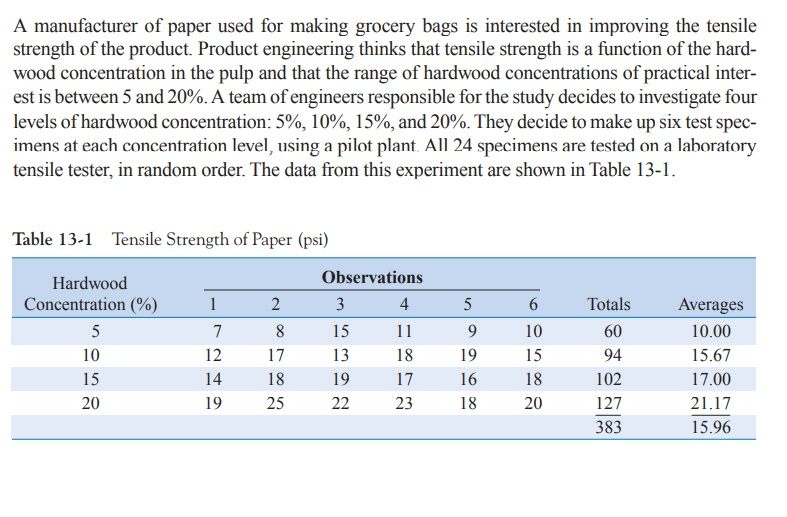

###Here the independent variable is the hardwood concentration. The groups/levels refer to the 4 rows corresponding to each concentration. Let us look at the python code for understanding the working of anova. Assume level of significance is 5%.

In [1]:
import pandas as pd
l1=[7,8,15,11,9,10]
l2=[12,17,13,18,19,15]
l3=[14,18,19,17,16,18]
l4=[19,25,22,23,18,20]
d={"5%":l1,"10%":l2,"15%":l3,"20%":l4}
df=pd.DataFrame(d)
df
#Here df is the data in the Wide Data Format

,5%,10%,15%,20%
0,7,12,14,19
1,8,17,18,25
2,15,13,19,22
3,11,18,17,23
4,9,19,16,18
5,10,15,18,20


In [2]:
dflong=pd.melt(df.reset_index(),id_vars=['index'],value_vars=["5%","10%","15%","20%"])
dflong.columns=['index','treatments','value']
dflong
#Here dflong is the data in the Long data format. For further processing we need data in this format as the wide format is not processed.

,index,treatments,value
0,0,5%,7
1,1,5%,8
2,2,5%,15
3,3,5%,11
4,4,5%,9
5,5,5%,10
6,0,10%,12
7,1,10%,17
8,2,10%,13
9,3,10%,18


In [3]:
from statsmodels.formula.api import ols
model=ols('value~C(treatments)',data=dflong).fit() #Prepare an anova model
import statsmodels.api as sap
at=sap.stats.anova_lm(model,typ=1)  #Prepare anova table
at

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),3.0,382.791667,127.597222,19.605207,0.000004
Residual,20.0,130.166667,6.508333,NaN,NaN


###The above table is the anova table. Here
###df stands for degrees of freedom.
###sum_sq stands for sum of squares
###mean_sq stands for mean of sum of squares=sum_sq/df
###In anova we have two types of sum of squares:
###1.Sum of squares due to treatment or Sum of squares between columns(SSTR/SSB)
###2.Sum of square of error/residual(SSE)
###In the table 382.89 is SSB while 130.166 is the SSE. The degrees of freedom corresponding to SSB is 3 while that of SSE is 20.
###Then we find the mean sum of squares using the formula shown above.
###In anova we assume that:
###1.For each population, the response(dependent) variable is normally distributed. (In this case, response variable is tensile strength)
###2.The variance of the response variable is the same for all the populations.
###3.The observations are independent.
###When these assumptions are true and Ho is also valid then the value of F statistic, which is F=(MSB/MSE), is part of the F distribution with the two degrees of freedom.
###Otherwise, the F statistic is very large since MSB(Mean Squares Between Columns) overestimates the variance.
###Thus we check if the p value corresponding to the F statistic is less than level of significance. If yes, then Ho is rejected, else it is not.
###In the given case, p value=0.000004 which is less than alpha=0.05. Thus Ho is rejected. This is the procedure of One way anova using completely randomnized design.


---

###Now suppose we want to find which pairs of means are equal. This is known as Post Hoc analysis. There are two methods for PHA:
###1.Fisher's Test: In fisher's test we perform t test on different pairs of means. Based on this we obtain a quantity called LSD(Least Significant Difference).
### LSD=t(N-a) x sqrt(2 x MSE/n)
###where N is the no. of observations, a= no. of levels
###n is the no. of observations per level.
###N-a is the degrees of freedom of t statistic
###For each pair of means(x1,x2) we check if |x1-x2|>LSD. If yes then x1 is not equal to x2, else they are equal.
###2.Tukey- Kramer Test: Similar to Fisher's test. Instead of LSD we use a quantity called Critical Range given by
### CR = Q x sqrt(MSE/n)
###where Q is the value taken from the Studentized Range Distribution for a and N-a degrees of freedom at alpha=0.05.
###Then we check if |x1-x2|>CR. If yes then x1 is not equal to x2, else they are equal.


In [4]:
#Performing PHA by Fisher's Test requires manual effort. But Tukey's test can be performed using statsmodels
import statsmodels.stats.multicomp as ssm
mc=ssm.MultiComparison(dflong['value'],dflong['treatments'])
mcresult=mc.tukeyhsd(0.05)
mcresult.summary()
#Where the 'reject' columns is false, it implies that the means for the two groups are equal.

group1,group2,meandiff,p-adj,lower,upper,reject
10%,15%,1.3333,0.8022,-2.7892,5.4559,False
10%,20%,5.5,0.0066,1.3774,9.6226,True
10%,5%,-5.6667,0.0051,-9.7892,-1.5441,True
15%,20%,4.1667,0.047,0.0441,8.2892,True
15%,5%,-7.0,0.0007,-11.1226,-2.8774,True
20%,5%,-11.1667,0.0,-15.2892,-7.0441,True


##**Randomnized Block Design**:
###In the above example, we assumed the data to be homogeneous i.e. all subjects behave in the same way when subjected to an experiment. But if the data is heterogeneous then these differences cause the MSE to be higher than expected. Thus we may be led to accept Ho even though we should not accept it. Let us consider the following example.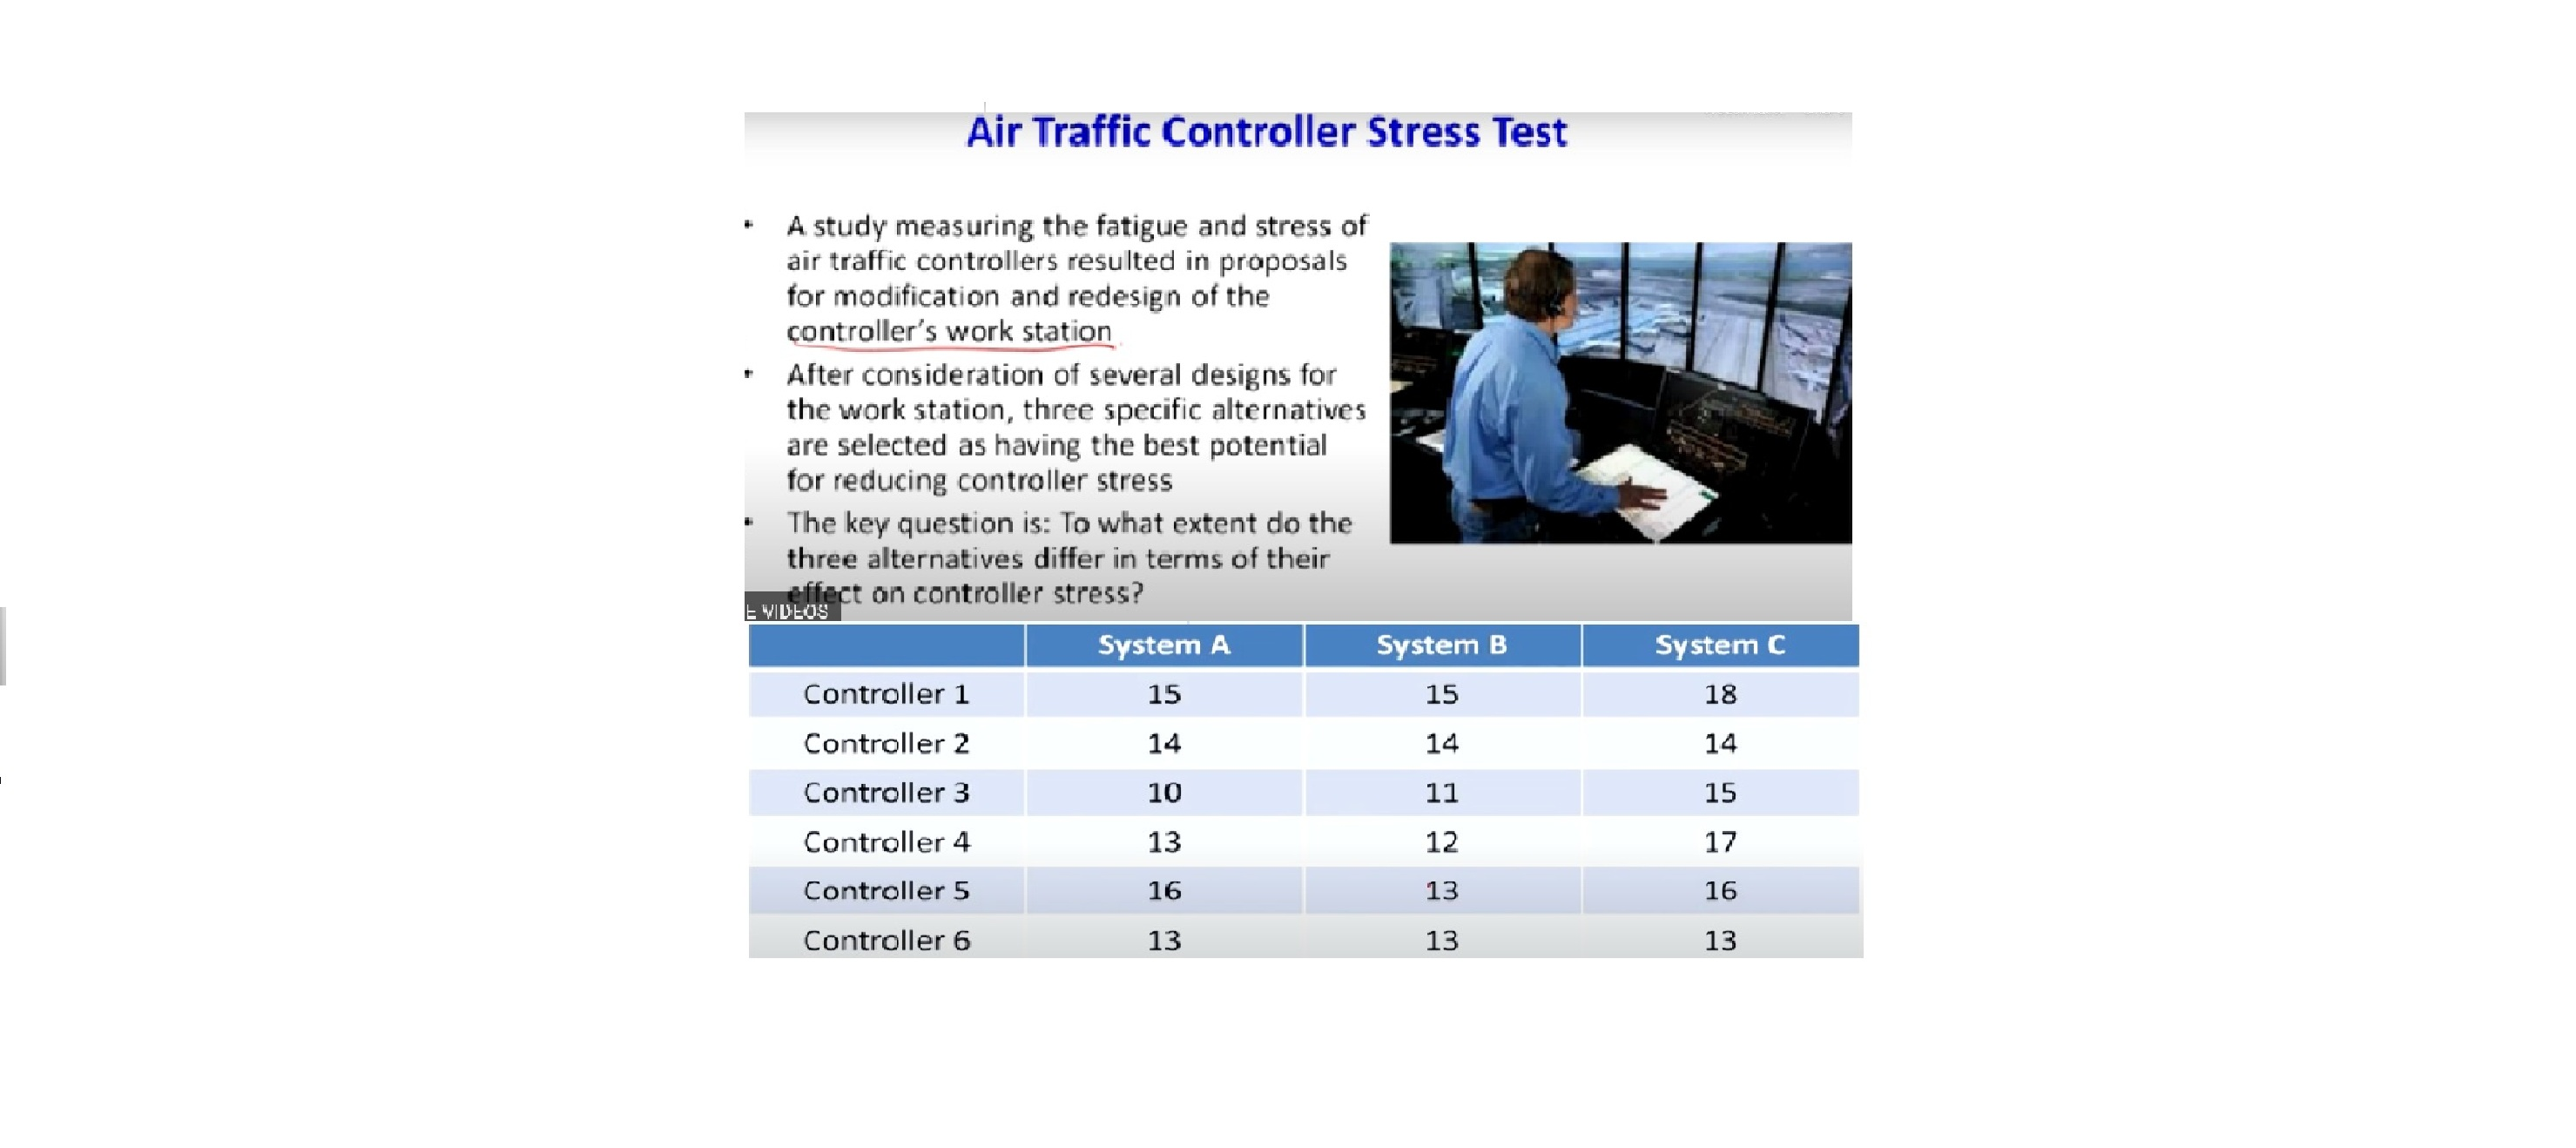

###Let level of significance be .05

In [5]:
del l1,l2,l3,l4,d
l1=[15,14,10,13,16,13]
l2=[15,14,11,12,13,13]
l3=[18,14,15,17,16,13]
d={"A":l1,"B":l2,"C":l3}
df1=pd.DataFrame(d)
df1long=pd.melt(df1.reset_index(),id_vars=['index'],value_vars=["A","B","C"])
df1long.columns=['index','treatments','value']
model1=ols('value~C(treatments)',data=df1long).fit() #Prepare an anova model
at1=sap.stats.anova_lm(model1,typ=1)  #Prepare anova table
at1

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),2.0,21.0,10.500000,3.214286,0.068903
Residual,15.0,49.0,3.266667,NaN,NaN


###In the above example, we missed the fact stress is a perception of the controller. What may be very stressful for one controller maybe no stress at all for another. Because of this difference MSE appears small and this causes the F statistic to be in the acceptance region. (as pvalue>.05)
###In RBD, we consider the block mean i.e. the mean across various levels(columns). Basically it is row mean. This results in a new square term called SSBL.
###The total sum of squares SST is given by
###SST= SSTR+SSBL+SSE
###Thus SSE can be calculated as SSE=SST-SSTR-SSBL
###Let us examing this in Python.

In [6]:
del l1,l2,l3,d
l1=[15,14,10,13,16,13]
l2=[15,14,11,12,13,13]
l3=[18,14,15,17,16,13]
d={"A":l1,"B":l2,"C":l3}
df2=pd.DataFrame(d)
df2long=pd.melt(df2.reset_index(),id_vars=['index'],value_vars=["A","B","C"])
df2long.columns=['block','treatments','value']
model2=ols('value~C(treatments)+C(block)',data=df2long).fit() #Prepare an anova model
at2=sap.stats.anova_lm(model2,typ=1)  #Prepare anova table
at2

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),2.0,21.0,10.5,5.526316,0.024181
C(block),5.0,30.0,6.0,3.157895,0.057399
Residual,10.0,19.0,1.9,NaN,NaN


###Now it is seen that the errot due to the differences is due to the block sum of squares and by removing it from SSE we get the true SSE. Now if we check the P value, we find that it is less than .05. Thus the F statistic lies in the rejection region and we m must reject Ho.
###Thus RBD is used in One way Anova test of heterogeneous data.

##**Two Way Anova**:
###This refers to the prescence of two independent variables. Thus there are two kinds of effects on the response variables:
###1.Main Effect: The effect of an independent variable on the response variable.
###2. Interaction Effect: The effect of the interaction/combination of independent variables on the response variable.
###Let us understand the working of two way anova from an example.
###Consider the scores of CAT exam. An institute is considering to offer three preparatory programs for CAT to students. The programs are as follows:
###1.3 hour review; covers most generally asked questions
###2.1 day program: covering relevant exam material+mock test
###3.10 week program: intensive course+personalized.
###Thus the program is an independent variable with three levels.
###Here the candidate's undergraduate background is also another independent variable. Generally there are three types of background:
###1.engineering
###2.arts and sciences
###3.business
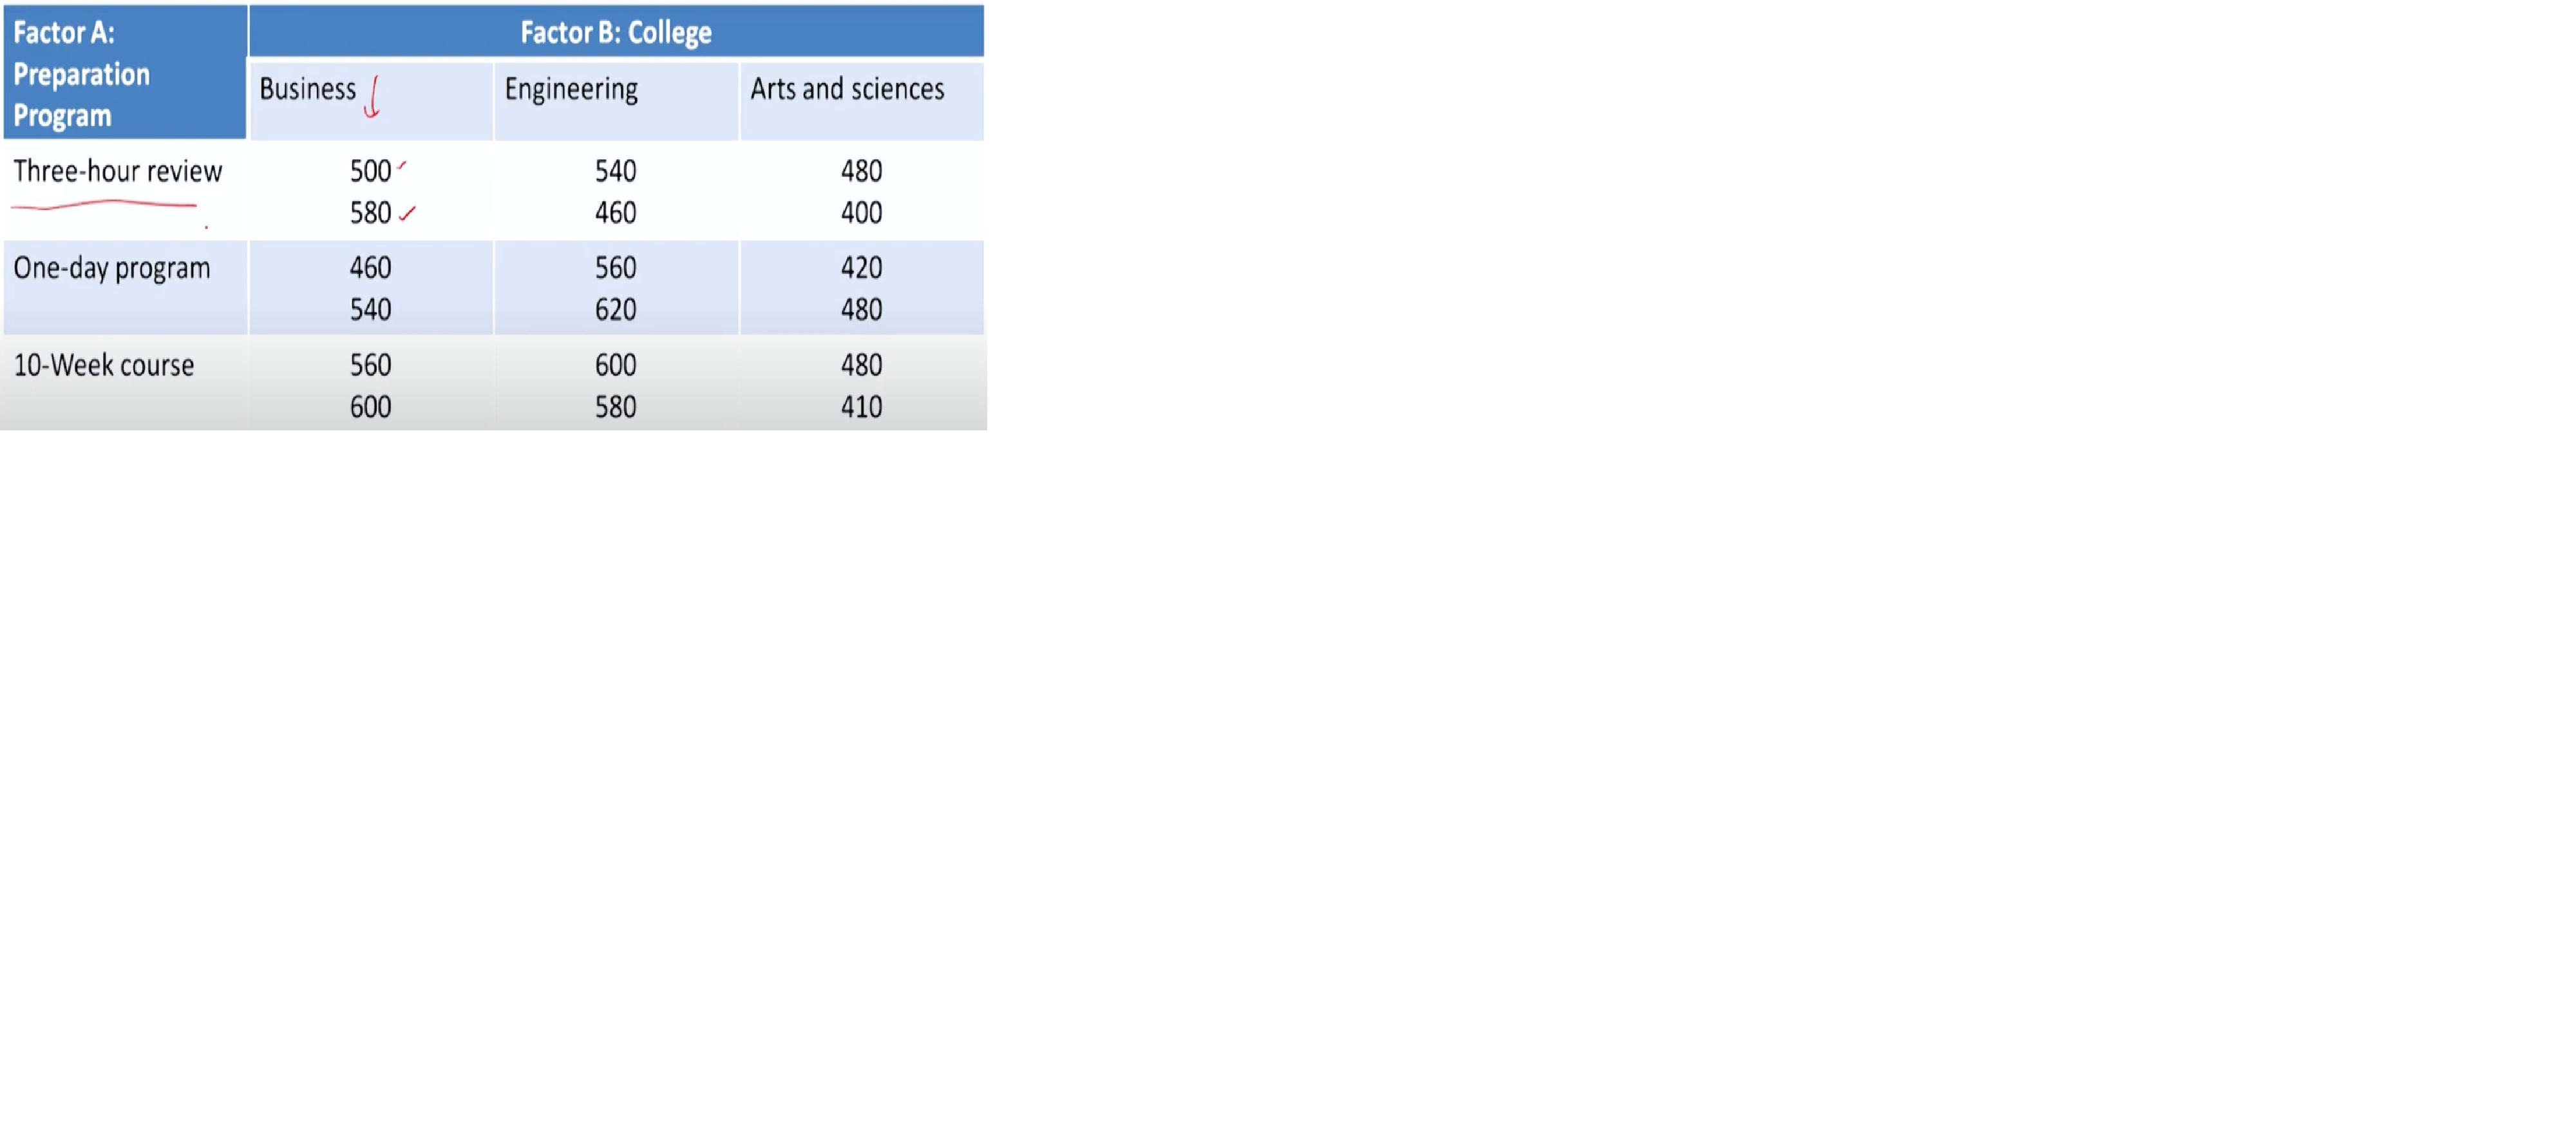
###Let level of significance be 5%. Let  us look at the working of 2 way anova through Python.


In [7]:
data=pd.read_csv("https://raw.githubusercontent.com/TXH2020/fast-labeling-workflow/master/Datasets/Data_Analytics_Python/twoanova.csv")    #Given data
data

,Value,prep_pro,college
0,500,three_hr,Business
1,580,three_hr,Business
2,540,three_hr,Engineering
3,460,three_hr,Engineering
4,480,three_hr,Arts_Science
5,400,three_hr,Arts_Science
6,460,One-day,Business
7,540,One-day,Business
8,560,One-day,Engineering
9,620,One-day,Engineering


In [8]:
formula='Value ~C(college)+C(prep_pro)+C(college):C(prep_pro)'
model3=ols(formula,data).fit()   #Producing two way anova table
at3=sap.stats.anova_lm(model3,typ=2)
at3

,sum_sq,df,F,PR(>F)
C(college),45300.0,2.0,10.269521,0.004757
C(prep_pro),6100.0,2.0,1.382872,0.299436
C(college):C(prep_pro),11200.0,4.0,1.269521,0.350328
Residual,19850.0,9.0,NaN,NaN


###From the 2 way anova table, we see that there are three p values. These p values correspond to three null hypotheses
###1. Ho:There is no effect of preparation program on CAT scores.
###2. Ho:There is no effect of undergraduate background(college) on CAT scores.
###3. Ho:There is no effect of the interaction of background and preparation program on CAT scores.
###For null hypotheses 1 and 3, the pvalue is greater than 5%. Thus Ho is true in both the cases, that is, neither Preparation program nor the interaction between prep program and college affects CAT scores.
###But for null hypothesis 2, the pvalue is less than 5%. Thus the 2nd null hypothesis is false. This implies that the candidate's undergraduate background has an effect on CAT scores.
###This is an example of two factor Factorial Test(called factorial because all possible combinations are tested). Thus a two way Anova test is a two factor factorial test.